# Build a TB model for hBN

In [1]:
from pythtb import tb_model
import numpy as np
import matplotlib.pyplot as plt

# Define lattice vectors for a 2D hexagonal lattice
lat = [[1.0, 0.0,0.0], [0.5, np.sqrt(3)/2,0.0],[0.0,0.0,10.0]]  # a1 and a2 vectors

# Define orbital positions (Boron at (0,0) and Nitrogen at (1/3, 1/3))
orb = [[0.0, 0.0, 0.0], [1/3, 1/3, 0.0]]  # Orbital positions within the unit cell

# Create the tight-binding model for 3D system (2D hexagonal lattice in 3D space)
model = tb_model(3, 3, lat, orb)
delta = 0.0
# Set on-site energies for the two orbitals (Boron and Nitrogen)
model.set_onsite([-delta, delta])  # ε_B = -1.0, ε_N = 1.0

# Set the hopping parameter between Boron and Nitrogen
t_BN = 1.0  # Hopping parameter between B and N

# Set the hopping terms
model.set_hop(t_BN, 0, 1, [0, 0, 0])  # Intra-cell B-N hopping
model.set_hop(t_BN, 0, 1, [1, 0, 0])  # B-N hopping in the +a1 direction
model.set_hop(t_BN, 0, 1, [0, 1, 0])  # B-N hopping in the +a2 direction
model.set_hop(t_BN, 0, 1, [-1, 1, 0]) # B-N hopping in the -a1 + a2 direction


---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,    10.0 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ,     0.0 ]
 #  1  ===>  [  0.6667 ,  0.6667 ,     0.0 ]
site energies:
 #  0  ===>      -1.0
 #  1  ===>       1.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ,  0 ] >     ===>     -1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  

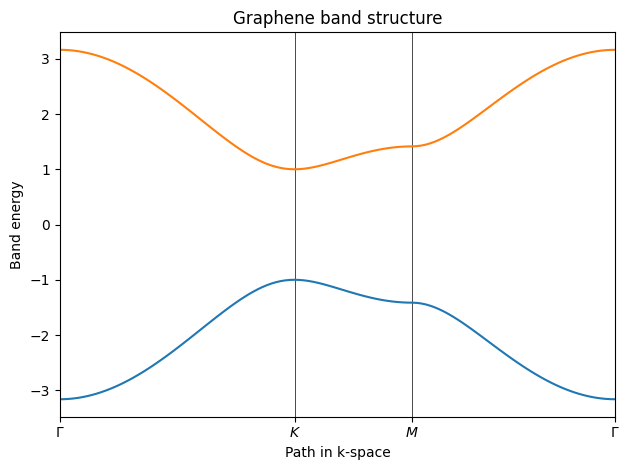

In [2]:
#!/usr/bin/env python

# Toy graphene model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.5,np.sqrt(3.0)/2.0,0.0],[0.0,0.0,10.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3., 0.0],[2./3.,2./3., 0.0]]

# make two dimensional tight-binding graphene model
my_model=tb_model(3,3,lat,orb)

# set model parameters
delta=1.0
t=-1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0, 0])
my_model.set_hop(t, 1, 0, [ 0, 1, 0])

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.],[2./3.,1./3,0.],[.5,.5,0.],[0.,0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("Graphene band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

In [3]:
lat_tmp = np.array(lat)

In [4]:
lat_tmp

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       , 10.       ]])

In [5]:
class tmp_lat():
    def __init__(self,lat):
        self.lat = np.array(lat)
        self.lat_vol = np.abs(np.dot(self.lat[2],np.cross(self.lat[0],self.lat[1])))
        self.rec_lat = self._rec_lat()
        self.rlat_vol = np.abs(np.dot(self.rec_lat[2],np.cross(self.rec_lat[0],self.rec_lat[1])))
    
    def _rec_lat(self):
        b1 = 2 * np.pi * np.cross(self.lat[1], self.lat[2]) / self.lat_vol
        b2 = 2 * np.pi * np.cross(self.lat[2], self.lat[0]) / self.lat_vol
        b3 = 2 * np.pi * np.cross(self.lat[0], self.lat[1]) / self.lat_vol

        # Combine the reciprocal lattice vectors into a matrix
        B = np.array([b1, b2, b3])        
        return B

In [6]:
c_lat = tmp_lat(lat)

In [7]:
c_lat.rec_lat

array([[ 6.28318531, -3.62759873,  0.        ],
       [ 0.        ,  7.25519746,  0.        ],
       [ 0.        ,  0.        ,  0.62831853]])

In [9]:
from yambopy import *
nnkp_kgrid = mp_grid(nx = 4 , ny = 4 , nz = 1, latdb=c_lat)
nnkp_qgrid = mp_grid (nx = 5 , ny = 5, nz = 1, latdb=c_lat )

In [10]:
# we need a temporary model class to call H2P without initializing wann_model
class mytb_model():
    def __init__(self, nc, nv, nnkp_kgrid, eigv, eigvec):
        self.nk = nnkp_kgrid.k.shape[0]
        self.mpgrid = nnkp_kgrid
        self.nb = eigv.shape[1]
        self.nc = nc 
        self.nv = nv
        self.eigv = eigv
        self.eigvec = eigvec
        self._get_T_table()

    def _get_T_table(self):
        ntransitions = self.nk*self.nc*self.nv
        T_table = np.zeros((ntransitions, 3),dtype=int)
        t_index = 0
        for ik in range(0,self.nk):
            for iv in range(0,self.nv):
                for ic in range(0,self.nc):
                        T_table[t_index] = [ik, iv, self.nv+ic]
                        t_index += 1
        self.ntransitions = ntransitions
        self.T_table = T_table

In [11]:
# get eigenvalues and eigenvectors from pythtb
eigv, eigvec = my_model.solve_all(nnkp_kgrid.k, eig_vectors=True)

In [12]:
# swap axes to match conventions from our yambopy-wannier library
eigv = my_model.solve_all(nnkp_kgrid.k).swapaxes(0,1)
eigvec = eigvec.transpose(1, 2, 0)

In [13]:
# Initialize H2P with this model
model = mytb_model(nc=1, nv=1, nnkp_kgrid = nnkp_kgrid, eigv = eigv, eigvec = eigvec)

In [14]:
cpot = CoulombPotentials(v0=0.03,ngrid=[4,4,4], lattice=c_lat, ediel=[1.0,10.0,1.0])

Warning! CoulombPotentials works with atomic units and return energy in eV 

                Check consistency of units in the methods, they have not been properly tested
              


In [15]:
# we can call this only with 
h2p_tmp = H2P(model, qmpgrid = nnkp_qgrid, method = 'model', cpot = cpot)


 Building H2P from model Coulomb potentials. Default is v2dt2



In [83]:
np.linalg.norm(eigvec[0,:,0])

1.0

# Visualize the grid and neighbours

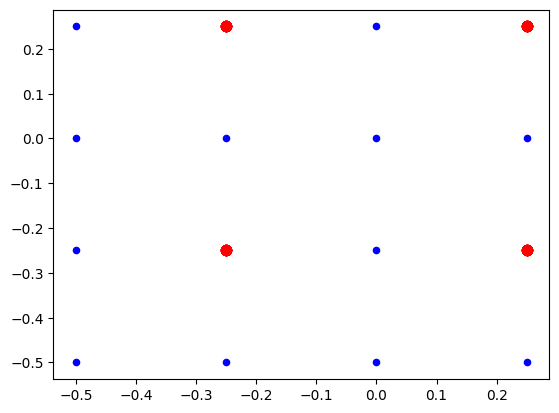

In [41]:
fig,ax = plt.subplots()
neigh = nnkp_kgrid.fold_into_bz(nnkp_kgrid.b_grid)
for ik,k in enumerate(nnkp_kgrid.k):
    ax.scatter(k[0], k[1], s = 20, c='blue')
    for j in range(0,8):
        ax.scatter(neigh[8*ik+j,0],neigh[8*ik+j,1], s=50,c = 'red')

# Build H2P and compute exciton band structure